# Data exploration with Pandas

###  Tree of Life
<table><tr><td><img src="http://t3.gstatic.com/licensed-image?q=tbn:ANd9GcSq4PRaxgfpjNOSe81JgN8l71DWtDHpkSfH3xo8EOk7khAlqQozXnJm8ubupyHj" width=300></td><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=300></td><td><img src="https://i.pinimg.com/originals/78/3f/98/783f983d622b06b9a990ad67efabbbe8.png" width=300></td></tr></table>

### Objective of this notebook
We will continue our data exploration with the dataset we used in Colab_Lec04. In this notebook, we will tackle real world questions with pandas. We will explore an kingdom of life data file. Each row in this data set represents a particular organism. An organism is classified in a particular Kingdom and Class.

Notebook adapted from Wendy Lee

In [4]:
# Import libraries
import pandas as pd

In [6]:
### Notice this dataset is separated by tab instead of comma
euk_filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# euk_df = pd.read_csv(<DATA>, sep=(<SEPARATOR>))

In [1]:
### A reminder of what columns are in this dataset and the size of the dataframe


In [8]:
### You can sort by one or more columns
# euk_df.sort_values('Species', ascending=True).head()

### Sort by two columns; sort col1 first, then for rows with identical value in col1 are sorted according to col2


### *Q1. How many fungal species have genomes size bigger than 100Mb? What are their names?*

**We need to filter a few things to address this question.**
1. Select all the Fungi under the "Kingdom" column.
2. Select all the Fungi with genome size greater than 100.
3. Select Species from the filtered data from step 2 above.

**Let's do it step by step. And then we will combine all of them in one line of code.**

In [9]:
### Filter dataframe and narrow down to only Kingdom that includes Fungi


To **combine two conditional statements** in the filtering, we need to surround each conditional statements with its own pair of **parentheses**.

In [10]:
### Narrow down to Fungi that has genome size > 100


In [11]:
## To select Species that are Fungi with genome size > 100 Mb
# euk_df[(euk_df["Kingdom"] == "Fungi") & (euk_df['Size (Mb)'] > 100)]['Species']

## Alternative way to call column with '.'

Convert the Series from the above #Q1 to a python list using `to_list()` method

In [14]:
speciesList = euk_df[ (euk_df.Kingdom == 'Fungi') &
                  (euk_df['Size (Mb)'] > 100)
                 ]["Species"].to_list()

## Slice for the top 10 on the list
speciesList[0:10]

### Q2. How many organisms are there for each Kingdom (plants, animals, fungi, protists, and other), and how many unique species names?

*Hint*: Any time we see a question involving the words ”how many
... for each ...” the answer is `value_counts()`.

In [13]:
euk_df.Kingdom.value_counts()

To address "how many unique species names?", count the unique species names for plants by filtering the dataframe. [`nunique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) returns the number of distinct, non-NA observations for each column (default) or row in a DataFrame

In [15]:
euk_df[(euk_df["Kingdom"] == "Plants")].Species.nunique()

In [16]:
### Write a loop to expand this to the other Kingdoms

# Kingdoms = ["Protists", "Plants", "Animals"]

for k in Kingdoms:
    print(k, euk_df[euk_df.Kingdom == k].Species.nunique())

#### To make the above more scalable
Hardcoding the values in kingdom is not scalable, we can implement a more elegant way to get a list of unique kingdom names directly from the dataframe [`unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) returns unique values in the order of apperance. It does NOT sort.

In [ ]:
### Return an array of unique values in Kingdom


### Use an array to make it more scalable


Protists 449
Plants 464
Fungi 2554
Animals 1442
Other 27


### Q3. Make a new dataframe containing just the rows for the *Aquila* genus.

**Let go over some biology terminologies**
- The names under the **Species** column are scientific names that made up of a *genus* name and a *species* name separated by a space. Example: *Homo sapiens*. Note: there are some species that don't follow that format and we will ignore them for now.

To solve this problem, we will need to **separate the genus and species names** for each value in the **Species** column.

In [ ]:
### Review how to split a string.
## What if we wanted to split string by ","?
a = "Homo sapiens"
a_split = a.split( )
print(a_split)
print(a_split[0])


# # Split the strings stored in the column Species
# euk_df.Species.str.split()

['Homo', 'sapiens']
Homo


In [ ]:
## Take the first element of each of the resulting lists (again remembering to refer to the str attribute):
## This gives us our series of genus names.
euk_df.Species.str.split().str[0]

0           Emiliania
1         Arabidopsis
2             Glycine
3            Medicago
4             Solanum
            ...      
8297    Saccharomyces
8298    Saccharomyces
8299    Saccharomyces
8300    Saccharomyces
8301    Saccharomyces
Name: Species, Length: 8302, dtype: object

In [ ]:
## Add the condition to get a series of boolean values:
euk_df.Species.str.split(' ').str[0] == "Aquila"

0       False
1       False
2       False
3       False
4       False
        ...  
8297    False
8298    False
8299    False
8300    False
8301    False
Name: Species, Length: 8302, dtype: bool

In [ ]:
## Plug the above into the original dataframe to select the rows that are True

aquila_data = euk_df[ (euk_df.Species.str.split(' ').str[0] == "Aquila") ]
aquila_data.head(1)

Species  Kingdom  Class  Size (Mb)      GC%  \
1755  Aquila chrysaetos canadensis  Animals  Birds    1192.74  41.9001   

     Number of genes Number of proteins  Publication year Assembly status  
1755           17520              31284              2014        Scaffold

In [ ]:
## Extract the genus name and combine it with other columns in the dataframe to create a new dataframe
euk_df['Genus']=euk_df.Species.str.split(" ").str[0]

neweuk = euk_df[["Species","Genus","Class","Kingdom"]]
neweuk.head(3)

Species        Genus           Class   Kingdom
0  Emiliania huxleyi CCMP1516    Emiliania  Other Protists  Protists
1        Arabidopsis thaliana  Arabidopsis     Land Plants    Plants
2                 Glycine max      Glycine     Land Plants    Plants

In [ ]:
euk_df.head(3)


Species   Kingdom           Class  Size (Mb)      GC%  \
0  Emiliania huxleyi CCMP1516  Protists  Other Protists    167.676     64.5   
1        Arabidopsis thaliana    Plants     Land Plants    119.669  36.0529   
2                 Glycine max    Plants     Land Plants    979.046  35.1153   

  Number of genes Number of proteins  Publication year Assembly status  \
0           38549              38554              2013        Scaffold   
1           38311              48265              2001      Chromosome   
2           59847              71219              2010      Chromosome   

         Genus  
0    Emiliania  
1  Arabidopsis  
2      Glycine

### Q4. Which organism have at least 10% more proteins than genes?

There are a few different ways to interpret ”10% more”, but for the purposes of this question we will say that we want to divide the number of proteins by the number of genes, and if the result is greater than or equal to 1.1 then we want to include the organism.

If you look at the `euk` dataframe, you will see that the columns **Number of proteins** and **Number of genes** are mixed with numeric values and dashes. To ensure that all the values in these two columns are numeric, we will use pandas method [`to_numeric`](https://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_numeric.html) to covert the values to numeric. We will set the `errors` argument to `'coerce'` to convert any non-numeric value to NaN (not a number).

In [ ]:
euk_df["Number of genes"] =  pd.to_numeric(euk_df["Number of genes"],  errors='coerce')
euk_df["Number of proteins"] =  pd.to_numeric(euk_df["Number of proteins"],  errors='coerce')
euk_df["GC%"] =  pd.to_numeric(euk_df["GC%"],  errors='coerce')

# automatically applying the division for each row
euk_df["Proteins per gene"] = euk_df["Number of proteins"]/euk_df["Number of genes"]
euk_df.head()

Species   Kingdom           Class  Size (Mb)      GC%  \
0  Emiliania huxleyi CCMP1516  Protists  Other Protists    167.676  64.5000   
1        Arabidopsis thaliana    Plants     Land Plants    119.669  36.0529   
2                 Glycine max    Plants     Land Plants    979.046  35.1153   
3         Medicago truncatula    Plants     Land Plants    412.924  34.0470   
4        Solanum lycopersicum    Plants     Land Plants    828.349  35.6991   

   Number of genes  Number of proteins  Publication year Assembly status  \
0          38549.0             38554.0              2013        Scaffold   
1          38311.0             48265.0              2001      Chromosome   
2          59847.0             71219.0              2010      Chromosome   
3          37603.0             41939.0              2011      Chromosome   
4          31200.0             37660.0              2010      Chromosome   

   Proteins per gene  
0           1.000130  
1           1.259821  
2           1.190018  
3           1.115310  
4           1.207051

In [17]:
### To filter the rows where the ratio of proteins and genes is
## greater than or equal to 1.1, we will get a series of boolean
## values by setting the condition.

euk_df[(euk_df["Proteins per gene"] >= 1.1)]

### Indexing in pandas
The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, `iloc` and `loc`. For more advanced operations, these are the ones you're supposed to be using.

#### Index-based selection
Pandas indexing works in one of two paradigms. The first is index-based selection: selecting data based on its numerical position in the data.`iloc` follows this paradigm.

To select the first row of data in a DataFrame, we may use the following:

In [18]:
### New df of only Fungi Kingdom
fungi = euk_df[(euk_df.Kingdom == 'Fungi')]

## Selecting first row
fungi.iloc[0]

## Extracting rows and columns

-  Extract specific rows and all columns

    ```df.iloc[rows]```

-  Extract specific rows and columns

    ```df.iloc[rows, columns]```

-  Extract specific rows and columns with specific indices

    ```df.iloc[start:stop:skip, start:stop:skip]```

#### Note that stop is exclusive

 ```[1:3]``` will extract the second and third rows for all columns.

```[1::2, :]```  will extract from the 2nd row all the way to the end every other row, and all the columns

```[:, :3]```  all rows, from the beginning to the 3rd column (indices 0, 1, 2)


In [ ]:
# ## Getting the second and third rows for all columns
fungi.iloc[1:3]

Kingdom        Class  Size (Mb)      GC%  \
Species                                                              
Pneumocystis carinii B80    Fungi  Ascomycetes    7.66146     27.8   
Schizosaccharomyces pombe   Fungi  Ascomycetes   12.59130  36.0381   

                          Number of genes Number of proteins  \
Species                                                        
Pneumocystis carinii B80             3695               3646   
Schizosaccharomyces pombe            6974               5132   

                           Publication year Assembly status  
Species                                                      
Pneumocystis carinii B80               2015          Contig  
Schizosaccharomyces pombe              2002      Chromosome

In [ ]:
# Getting every other rows from the first row to the 10th row, and extracting 4th and 5th columns
fungi.iloc[0:10:2, 3:5]

Size (Mb)      GC%
8    12.15710  38.1556
11   12.59130  36.0381
13   29.38500  49.8105
15   14.28270  33.4827
33    2.49752  47.3005

Both loc and iloc are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

This means that it's marginally easier to retrieve rows, and marginally harder to get retrieve columns. To get a column with iloc, we can do the following:

In [ ]:
## Select all rows, first column
fungi.iloc[:, 0]

8       Saccharomyces cerevisiae S288C
10            Pneumocystis carinii B80
11           Schizosaccharomyces pombe
12        Aspergillus nidulans FGSC A4
13         Aspergillus fumigatus Af293
                     ...              
8297          Saccharomyces cerevisiae
8298          Saccharomyces cerevisiae
8299          Saccharomyces cerevisiae
8300          Saccharomyces cerevisiae
8301          Saccharomyces cerevisiae
Name: Species, Length: 4494, dtype: object

On its own, the `:` operator, which also comes from native Python, means "everything". When combined with other selectors, however, it can be used to indicate a range of values. For example, to omit the first 3 columns and extract just the first three rows, we would do:

In [ ]:
fungi.iloc[:3, 3:]

GC% Number of genes Number of proteins  \
Species                                                                      
Saccharomyces cerevisiae S288C  38.1556            6445               6002   
Pneumocystis carinii B80           27.8            3695               3646   
Schizosaccharomyces pombe       36.0381            6974               5132   

                                Publication year  Assembly status  
Species                                                            
Saccharomyces cerevisiae S288C              1999  Complete Genome  
Pneumocystis carinii B80                    2015           Contig  
Schizosaccharomyces pombe                   2002       Chromosome

#### Label-based selection
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

In [ ]:
## Getting all rows, and specific columns based on their headers
fungi.loc[:, ['Species', 'Number of genes', 'Number of proteins']]

Species Number of genes Number of proteins
8     Saccharomyces cerevisiae S288C            6445               6002
10          Pneumocystis carinii B80            3695               3646
11         Schizosaccharomyces pombe            6974               5132
12      Aspergillus nidulans FGSC A4            9586               9556
13       Aspergillus fumigatus Af293           19832              19260
...                              ...             ...                ...
8297        Saccharomyces cerevisiae               -                  -
8298        Saccharomyces cerevisiae             155                298
8299        Saccharomyces cerevisiae               -                  -
8300        Saccharomyces cerevisiae               -                  -
8301        Saccharomyces cerevisiae               -                  -

[4494 rows x 3 columns]

### Set row index using a specific column

In [ ]:
fungi.set_index('Species', inplace=True)
fungi.head()

Kingdom        Class  Size (Mb)      GC%  \
Species                                                                   
Saccharomyces cerevisiae S288C   Fungi  Ascomycetes   12.15710  38.1556   
Pneumocystis carinii B80         Fungi  Ascomycetes    7.66146  27.8000   
Schizosaccharomyces pombe        Fungi  Ascomycetes   12.59130  36.0381   
Aspergillus nidulans FGSC A4     Fungi  Ascomycetes   30.27600  50.2721   
Aspergillus fumigatus Af293      Fungi  Ascomycetes   29.38500  49.8105   

                                Number of genes  Number of proteins  \
Species                                                               
Saccharomyces cerevisiae S288C           6445.0              6002.0   
Pneumocystis carinii B80                 3695.0              3646.0   
Schizosaccharomyces pombe                6974.0              5132.0   
Aspergillus nidulans FGSC A4             9586.0              9556.0   
Aspergillus fumigatus Af293             19832.0             19260.0   

                                Publication year  Assembly status  \
Species                                                             
Saccharomyces cerevisiae S288C              1999  Complete Genome   
Pneumocystis carinii B80                    2015           Contig   
Schizosaccharomyces pombe                   2002       Chromosome   
Aspergillus nidulans FGSC A4                2003         Scaffold   
Aspergillus fumigatus Af293                 2005       Chromosome   

                                Proteins per gene  
Species                                            
Saccharomyces cerevisiae S288C           0.931265  
Pneumocystis carinii B80                 0.986739  
Schizosaccharomyces pombe                0.735876  
Aspergillus nidulans FGSC A4             0.996870  
Aspergillus fumigatus Af293              0.971158

### Reset dataframe's index

In [ ]:
### Can you retrieve the condition of GC% > 50.00?
GC_fungi = fungi[fungi['GC%'] > 50.00]

In [ ]:
### Need to reset the index because GC_fungi is multitier


Species Kingdom           Class  Size (Mb)      GC%  \
0  Aspergillus nidulans FGSC A4   Fungi     Ascomycetes    30.2760  50.2721   
1   Phanerochaete chrysosporium   Fungi  Basidiomycetes    39.2051  56.5000   
2   Aspergillus terreus NIH2624   Fungi     Ascomycetes    29.3640  52.8000   
3      Pyricularia oryzae 70-15   Fungi     Ascomycetes    40.9791  51.5882   
4           Ustilago maydis 521   Fungi  Basidiomycetes    19.6644  54.0121   

   Number of genes  Number of proteins  Publication year Assembly status  \
0           9586.0              9556.0              2003        Scaffold   
1              NaN                 NaN              2016          Contig   
2          10551.0             10401.0              2005        Scaffold   
3          13184.0             12989.0              2003      Chromosome   
4           6909.0              6782.0              2003      Chromosome   

   Proteins per gene  
0           0.996870  
1                NaN  
2           0.985783  
3           0.985209  
4           0.981618

In [ ]:
# Getting specific rows based on the row index and all columns
fungi.loc[['Saccharomyces cerevisiae'], :]

Kingdom        Class  Size (Mb)      GC%  \
Species                                                             
Saccharomyces cerevisiae   Fungi  Ascomycetes  12.086300  38.1473   
Saccharomyces cerevisiae   Fungi  Ascomycetes  12.165500  38.3121   
Saccharomyces cerevisiae   Fungi  Ascomycetes  12.134300  38.1573   
Saccharomyces cerevisiae   Fungi  Ascomycetes  12.150900  38.5859   
Saccharomyces cerevisiae   Fungi  Ascomycetes  12.071900  38.3205   
...                          ...          ...        ...      ...   
Saccharomyces cerevisiae   Fungi  Ascomycetes   3.993920  38.2000   
Saccharomyces cerevisiae   Fungi  Ascomycetes   0.586761  38.5921   
Saccharomyces cerevisiae   Fungi  Ascomycetes  12.020400  38.2971   
Saccharomyces cerevisiae   Fungi  Ascomycetes  11.960900  38.2413   
Saccharomyces cerevisiae   Fungi  Ascomycetes  11.820700  38.2536   

                          Number of genes  Number of proteins  \
Species                                                         
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae              NaN                 NaN   
...                                   ...                 ...   
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae            155.0               298.0   
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae              NaN                 NaN   
Saccharomyces cerevisiae              NaN                 NaN   

                          Publication year  Assembly status          Genus  \
Species                                                                      
Saccharomyces cerevisiae              2015  Complete Genome  Saccharomyces   
Saccharomyces cerevisiae              2018  Complete Genome  Saccharomyces   
Saccharomyces cerevisiae              2019  Complete Genome  Saccharomyces   
Saccharomyces cerevisiae              2015       Chromosome  Saccharomyces   
Saccharomyces cerevisiae              2016       Chromosome  Saccharomyces   
...                                    ...              ...            ...   
Saccharomyces cerevisiae              2017         Scaffold  Saccharomyces   
Saccharomyces cerevisiae              1992       Chromosome  Saccharomyces   
Saccharomyces cerevisiae              2018       Chromosome  Saccharomyces   
Saccharomyces cerevisiae              2018       Chromosome  Saccharomyces   
Saccharomyces cerevisiae              2018       Chromosome  Saccharomyces   

                          Proteins per gene  
Species                                      
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae                NaN  
...                                     ...  
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae           1.922581  
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae                NaN  
Saccharomyces cerevisiae                NaN  

[576 rows x 10 columns]

In [ ]:
fungi.reset_index(inplace=True)
fungi.head()

Species Kingdom        Class  Size (Mb)      GC%  \
0  Saccharomyces cerevisiae S288C   Fungi  Ascomycetes   12.15710  38.1556   
1        Pneumocystis carinii B80   Fungi  Ascomycetes    7.66146  27.8000   
2       Schizosaccharomyces pombe   Fungi  Ascomycetes   12.59130  36.0381   
3    Aspergillus nidulans FGSC A4   Fungi  Ascomycetes   30.27600  50.2721   
4     Aspergillus fumigatus Af293   Fungi  Ascomycetes   29.38500  49.8105   

   Number of genes  Number of proteins  Publication year  Assembly status  \
0           6445.0              6002.0              1999  Complete Genome   
1           3695.0              3646.0              2015           Contig   
2           6974.0              5132.0              2002       Chromosome   
3           9586.0              9556.0              2003         Scaffold   
4          19832.0             19260.0              2005       Chromosome   

                 Genus  Proteins per gene  
0        Saccharomyces           0.931265  
1         Pneumocystis           0.986739  
2  Schizosaccharomyces           0.735876  
3          Aspergillus           0.996870  
4          Aspergillus           0.971158

**Data visualizing with Pie plot**  
Dataframe has a built-in pie chart plotting(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html). While it is not as customizable as later libraries that we will use such as matplotlib, it allows us to quickly plot a pie chart from the dataframe. Additionally you can specify the size plot you want to return using the parameter figsize).


<Axes: ylabel='Publication year'>

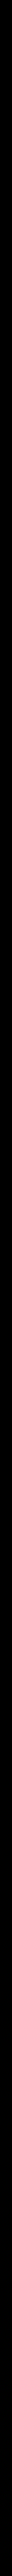

In [ ]:
## Pass in the column that you want to plot as your "y" variable.
fungi.plot.pie(y='Publication year', figsize=(5, 5))
